In [1]:
import matplotlib.pyplot as plt
from oqtant.schemas.quantum_matter import QuantumMatterFactory
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import rotate
from scipy.optimize import curve_fit
from copy import deepcopy

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│            20 │                 0 │                 80 │                  0 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [7]:
base_filename = "Background/Background_0_rep_"
num_runs = 3

repeated_trial_matters = [
    qmf.load_matter_from_file(f"{base_filename}{i:d}.txt", refresh=False)
    for i in range(num_runs)
]


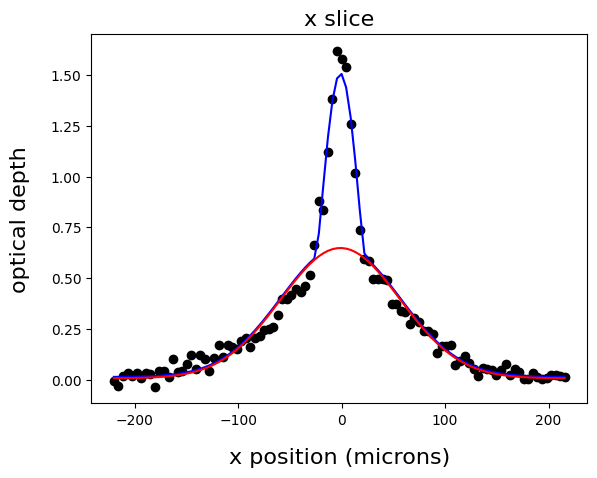

In [31]:
repeated_trial_matters[0].output.plot_slice()

In [29]:
t_rows = repeated_trial_matters[0].output.tof_image.rows
t_columns = repeated_trial_matters[0].output.tof_image.columns
t_pixcal = repeated_trial_matters[0].output.get_image_pixcal(image="TIME_OF_FLIGHT")

avg_t_pixels = np.zeros((t_rows, t_columns))
avg_slice = np.zeros(t_columns)

for trial in repeated_trial_matters:
    avg_t_pixels += trial.output.get_image_data(image="TIME_OF_FLIGHT")
    avg_slice += trial.output.get_image_data(image="TIME_OF_FLIGHT")[int(t_rows / 2)]

avg_t_pixels /= num_runs
avg_slice /= num_runs

x_positions = np.arange(
    -t_columns / 2 * t_pixcal, t_columns / 2 * t_pixcal, t_pixcal
)
y_positions = np.arange(-t_rows / 2 * t_pixcal, t_rows / 2 * t_pixcal, t_pixcal)


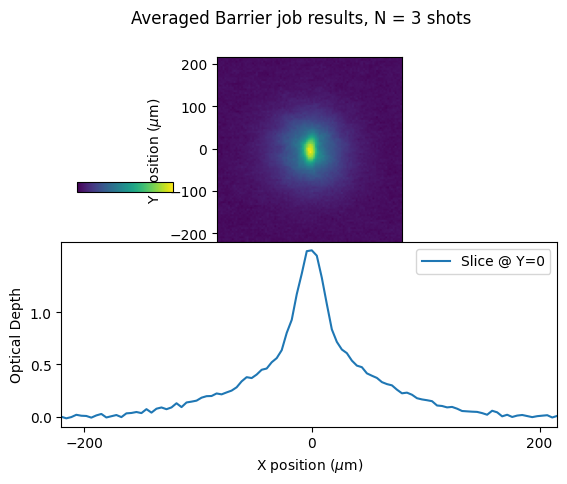

In [30]:
fig, axs = plt.subplots(nrows=2, sharex=True)
fig.suptitle("Averaged Barrier job results, N = 3 shots")
im = axs[0].imshow(
    avg_t_pixels,
    extent=[x_positions[0], x_positions[-1], y_positions[0], y_positions[-1]],
)
cbaxes = fig.add_axes([0.15, 0.6, 0.15, 0.02])
cb = plt.colorbar(im, cax=cbaxes, ticks=[0.0, 1], orientation="horizontal")
cbaxes.tick_params(color="w", labelcolor="w")

axs[1].plot(x_positions, avg_slice, label="Slice @ Y=0")
axs[1].set_ylabel("Optical Depth")
axs[1].set_yticks([0, 0.5, 1])
axs[1].set_xlabel("X position ($\mu$m)")
axs[1].legend()
axs[0].set_ylabel("Y position ($\mu$m)")
plt.subplots_adjust(hspace=0)
plt.show()

### Dark Solitons 

In [33]:
exps = np.arange(0,14,2)

DS_matters = [
    qmf.load_matter_from_file(f"Dark/DS_hold_time_{i:d}_rep_0.txt", refresh=False)
    for i in exps
]

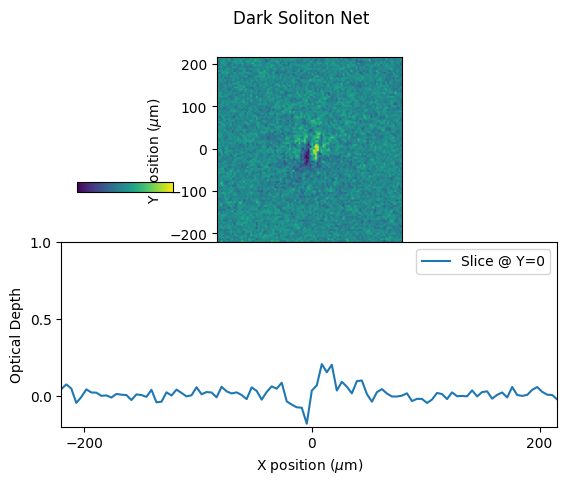

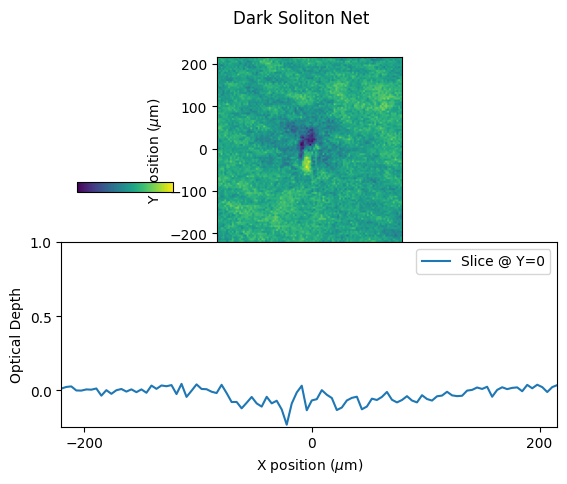

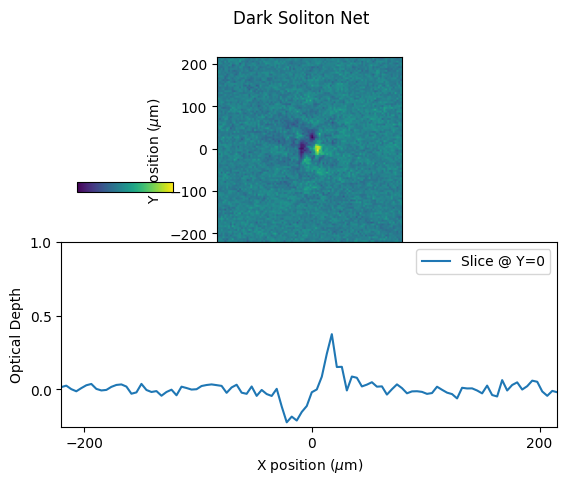

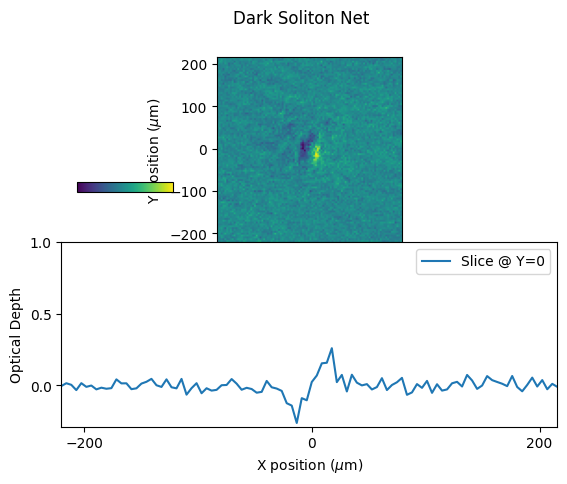

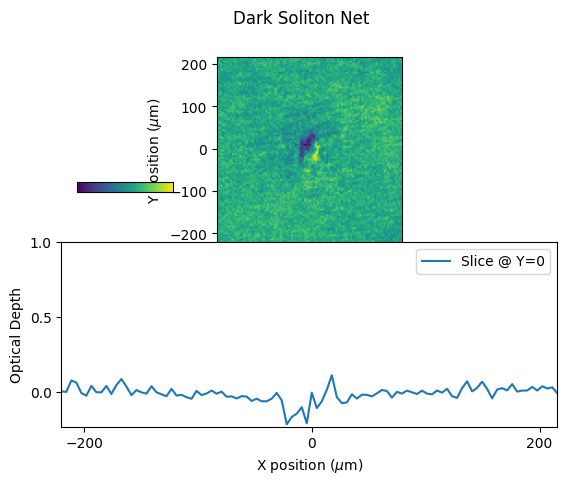

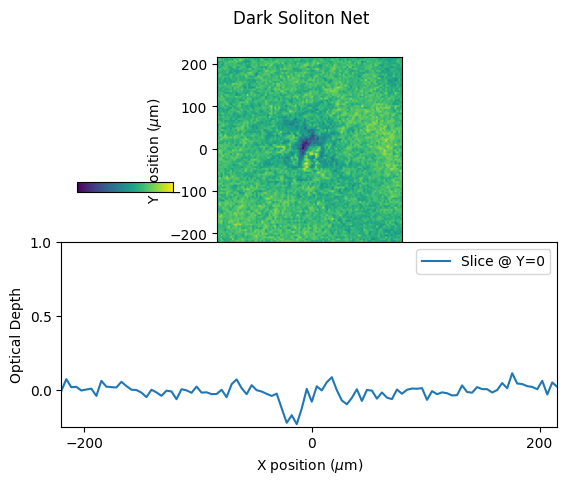

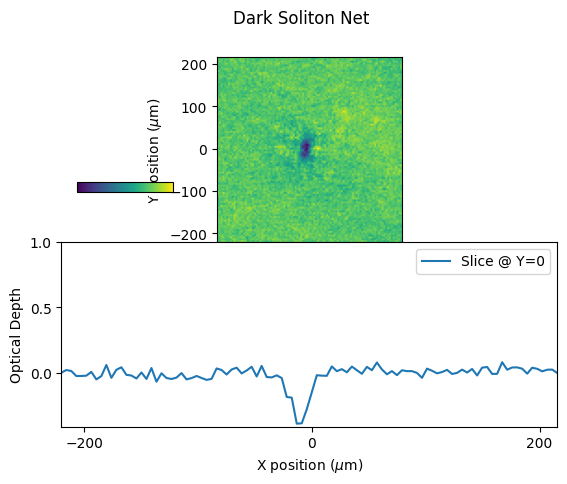

In [47]:
ds_min = []
for DS_matter in DS_matters:
    subedDS_t_pixels = np.zeros((t_rows, t_columns))
    subedDS_slice = np.zeros(t_columns)
    t_rows = DS_matter.output.tof_image.rows
    t_columns = DS_matter.output.tof_image.columns
    t_pixcal = DS_matter.output.get_image_pixcal(image="TIME_OF_FLIGHT")
    
    ds_t_pixels = DS_matter.output.get_image_data(image="TIME_OF_FLIGHT")
    ds_slice = DS_matter.output.get_image_data(image="TIME_OF_FLIGHT")[int(t_rows / 2)]
    
    subedDS_t_pixels = ds_t_pixels - avg_t_pixels
    subedDS_slice = ds_slice - avg_slice

    x_positions = np.arange(
        -t_columns / 2 * t_pixcal, t_columns / 2 * t_pixcal, t_pixcal
    )

    y_positions = np.arange(-t_rows / 2 * t_pixcal, t_rows / 2 * t_pixcal, t_pixcal)

    fig, axs = plt.subplots(nrows=2, sharex=True)
    fig.suptitle("Dark Soliton Net")
    im = axs[0].imshow(
        subedDS_t_pixels,
        extent=[x_positions[0], x_positions[-1], y_positions[0], y_positions[-1]],
    )
    cbaxes = fig.add_axes([0.15, 0.6, 0.15, 0.02])
    cb = plt.colorbar(im, cax=cbaxes, ticks=[0.0, 1], orientation="horizontal")
    cbaxes.tick_params(color="w", labelcolor="w")

    axs[1].plot(x_positions, subedDS_slice, label="Slice @ Y=0")
    axs[1].set_ylabel("Optical Depth")
    axs[1].set_yticks([0, 0.5, 1])
    axs[1].set_xlabel("X position ($\mu$m)")
    axs[1].legend()
    axs[0].set_ylabel("Y position ($\mu$m)")
    plt.subplots_adjust(hspace=0)
    plt.show()
    
    ds_min.append(np.argmin(subedDS_slice))

In [48]:
ds_min

[49, 45, 45, 47, 45, 47, 47]

In [40]:
exps = np.arange(0,16,2)

FS_matters = [
    qmf.load_matter_from_file(f"HoldTime/FS_hold_time_{i:d}_rep_0.txt", refresh=False)
    for i in exps
]

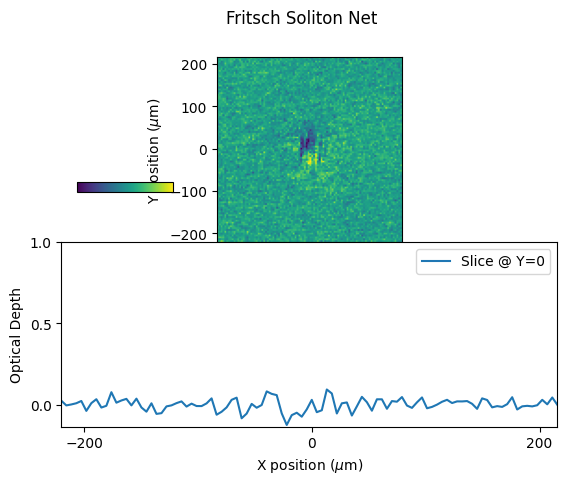

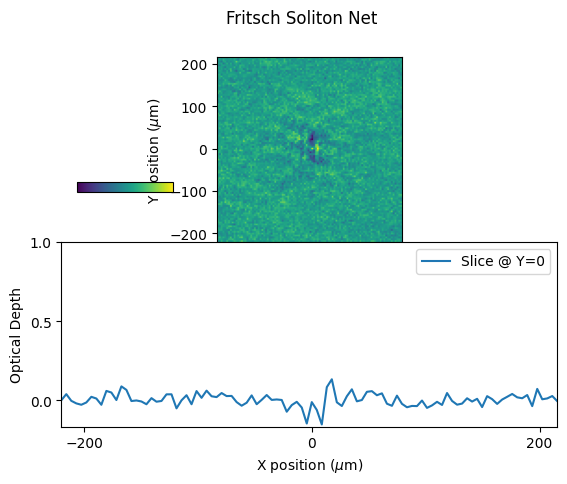

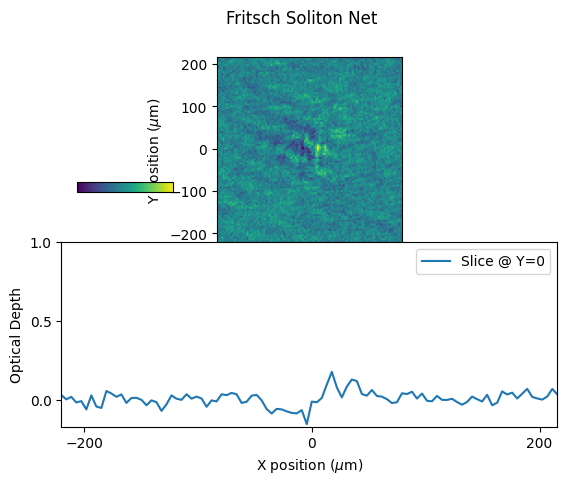

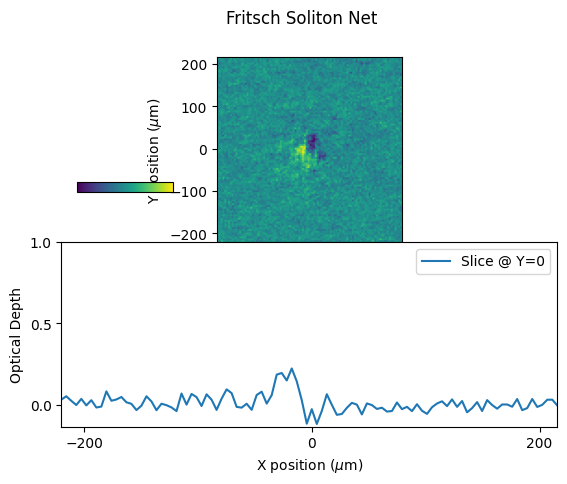

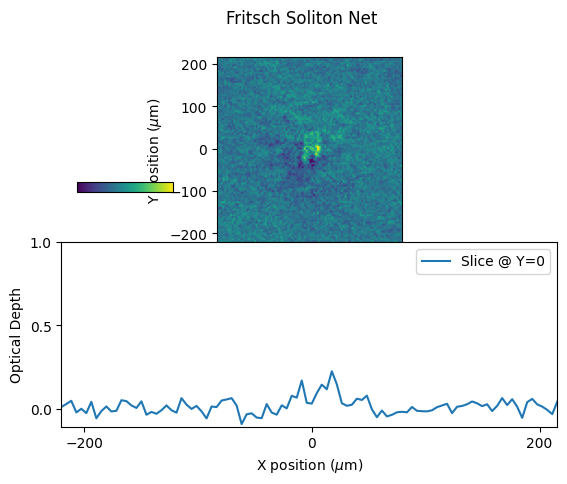

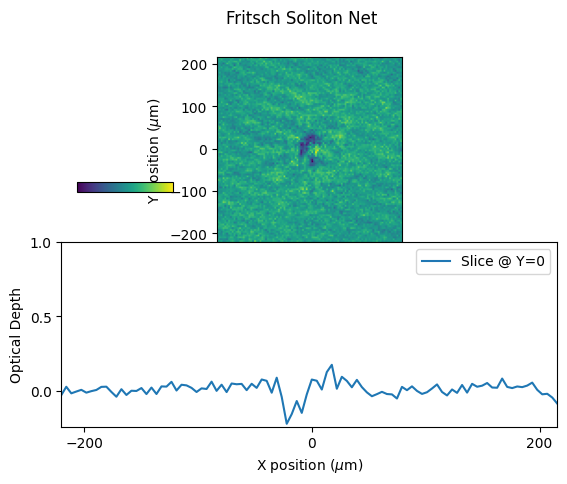

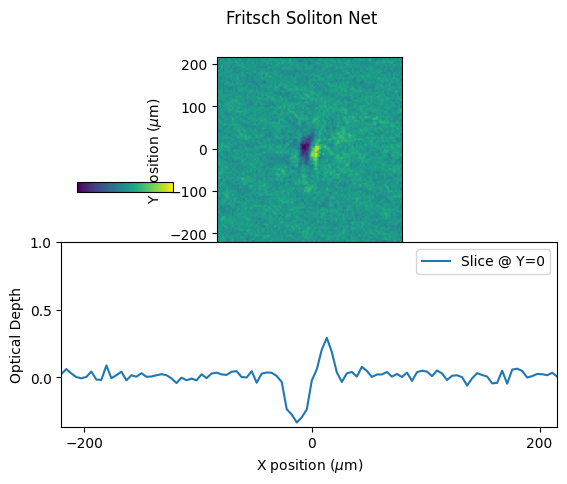

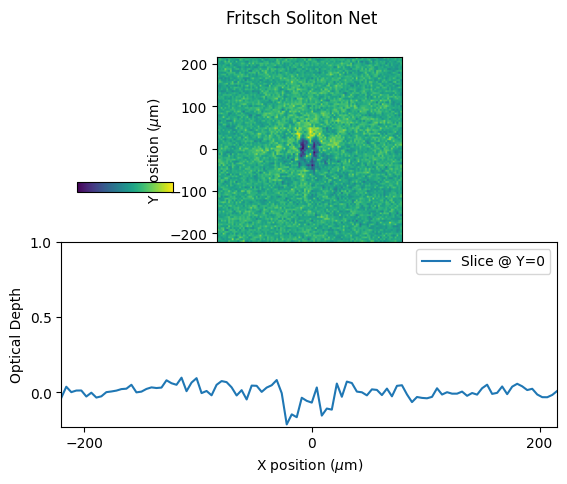

In [44]:
for FS_matter in FS_matters:
    subedFS_t_pixels = np.zeros((t_rows, t_columns))
    subedFS_slice = np.zeros(t_columns)
    t_rows = FS_matter.output.tof_image.rows
    t_columns = FS_matter.output.tof_image.columns
    t_pixcal = FS_matter.output.get_image_pixcal(image="TIME_OF_FLIGHT")
    
    fs_t_pixels = FS_matter.output.get_image_data(image="TIME_OF_FLIGHT")
    fs_slice = FS_matter.output.get_image_data(image="TIME_OF_FLIGHT")[int(t_rows / 2)]
    
    subedFS_t_pixels = fs_t_pixels - avg_t_pixels
    subedFS_slice = fs_slice - avg_slice

    x_positions = np.arange(
        -t_columns / 2 * t_pixcal, t_columns / 2 * t_pixcal, t_pixcal
    )

    y_positions = np.arange(-t_rows / 2 * t_pixcal, t_rows / 2 * t_pixcal, t_pixcal)

    fig, axs = plt.subplots(nrows=2, sharex=True)
    fig.suptitle("Fritsch Soliton Net")
    im = axs[0].imshow(
        subedFS_t_pixels,
        extent=[x_positions[0], x_positions[-1], y_positions[0], y_positions[-1]],
    )
    cbaxes = fig.add_axes([0.15, 0.6, 0.15, 0.02])
    cb = plt.colorbar(im, cax=cbaxes, ticks=[0.0, 1], orientation="horizontal")
    cbaxes.tick_params(color="w", labelcolor="w")

    axs[1].plot(x_positions, subedFS_slice, label="Slice @ Y=0")
    axs[1].set_ylabel("Optical Depth")
    axs[1].set_yticks([0, 0.5, 1])
    axs[1].set_xlabel("X position ($\mu$m)")
    axs[1].legend()
    axs[0].set_ylabel("Y position ($\mu$m)")
    plt.subplots_adjust(hspace=0)
    plt.show()
    